In [4]:
import sys
import os

notebook_dir = os.getcwd()
sys.path.append(os.path.dirname(notebook_dir))
from CONNECT_TO_DB import setup_connection
import matplotlib.pyplot as plt
import psycopg2

In [10]:
QUERY = """
SELECT event_time, price, user_id FROM customers WHERE event_time IS NOT NULL AND event_type = 'purchase';
"""

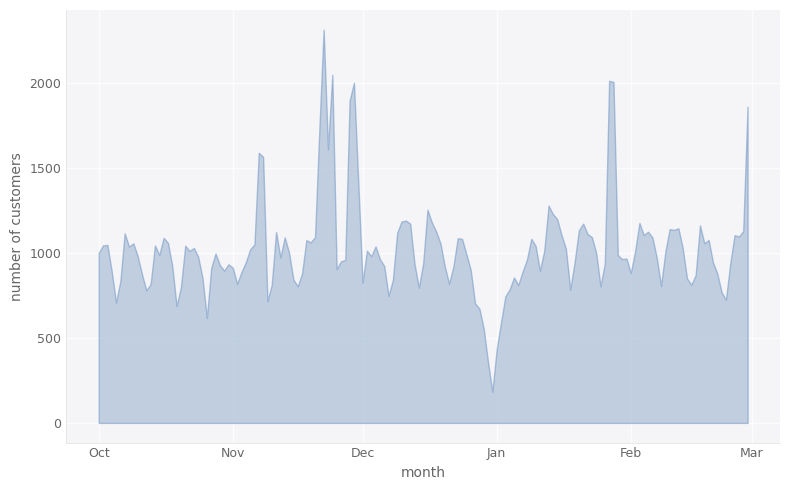

In [12]:
from collections import defaultdict
from datetime import datetime
import matplotlib.pyplot as plt
import os

# Set global matplotlib style to match target aesthetic
plt.rcParams.update({
    'font.size': 10,
    'axes.labelsize': 10,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'axes.titlesize': 0,
    'figure.figsize': (8, 5),
    'axes.grid': True,  # Enable grid
    'axes.facecolor': '#f5f5f8',  # Light purple-gray background
    'figure.facecolor': 'white',
    'axes.edgecolor': '#e0e0e0',  # Light gray edges
    'axes.linewidth': 0.5,
    'font.family': 'sans-serif',
    'grid.color': '#ffffff',      # White grid lines
    'grid.linewidth': 1,
    'grid.alpha': 0.8
})

def visualize_customer_flow():
    conn = setup_connection()
    cur = conn.cursor()
    cur.execute("SELECT event_time, user_id FROM customers WHERE event_time IS NOT NULL AND event_type = 'purchase';")
    rows = cur.fetchall()
    cur.close()
    conn.close()
    day_users = defaultdict(set)
    for event_time, user_id in rows:
        day = event_time.date()
        day_users[day].add(user_id)
    days = sorted(day_users.keys())
    counts = [len(day_users[day]) for day in days]
    fig, ax = plt.subplots()
    ax.fill_between(days, counts, alpha=0.6, color='#9db4d1', linewidth=1, edgecolor='#7a9cc6')
    ax.set_xlabel('month', color='#666666')
    ax.set_ylabel('number of customers', color='#666666')
    import matplotlib.dates as mdates
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#e0e0e0')
    ax.spines['bottom'].set_color('#e0e0e0')
    ax.tick_params(colors='#666666', length=0)
    ax.grid(True, which='major', axis='both', color='white', linewidth=1, alpha=0.8)
    ax.set_axisbelow(True)
    plt.tight_layout()
    plt.show()

visualize_customer_flow()


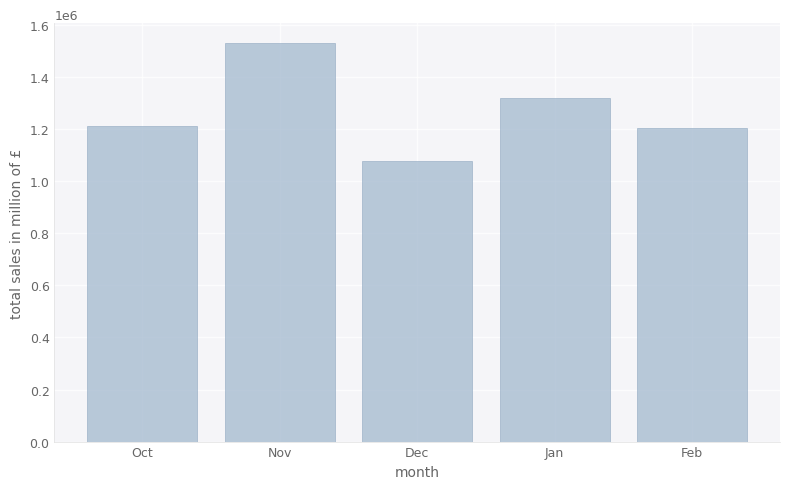

In [14]:
def visualize_sales_monthly():
    conn = setup_connection()
    cur = conn.cursor()
    cur.execute("SELECT event_time, price FROM customers WHERE event_time IS NOT NULL AND event_type = 'purchase';")
    rows = cur.fetchall()
    cur.close()
    conn.close()
    month_sales = defaultdict(float)
    for event_time, price in rows:
        month = event_time.strftime('%b')
        month_sales[month] += float(price)
    month_order = ['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar']
    months = [m for m in month_order if m in month_sales]
    sales = [month_sales[m] for m in months]
    fig, ax = plt.subplots()
    bars = ax.bar(months, sales, color='#a8bdd1', alpha=0.8, edgecolor='#8fa8c0', linewidth=0.5)
    ax.set_xlabel('month', color='#666666')
    ax.set_ylabel('total sales in million of £', color='#666666')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#e0e0e0')
    ax.spines['bottom'].set_color('#e0e0e0')
    ax.tick_params(colors='#666666', length=0)
    ax.grid(True, which='major', axis='both', color='white', linewidth=1, alpha=0.8)
    ax.set_axisbelow(True)
    plt.tight_layout()
    plt.show()

visualize_sales_monthly()

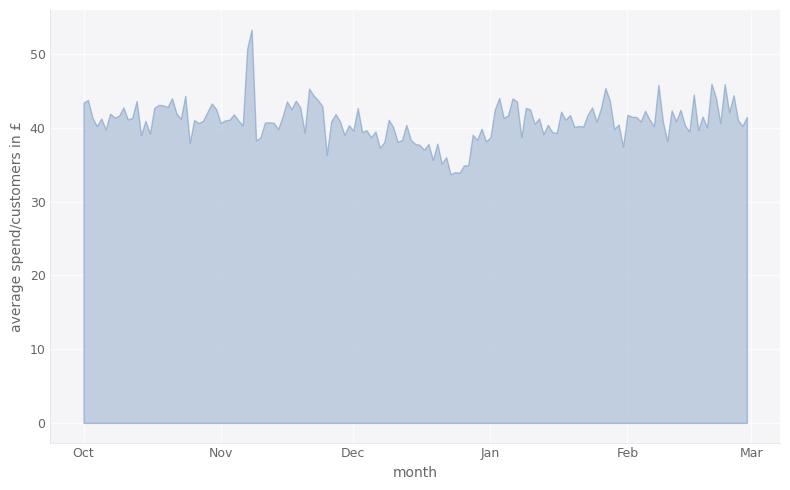

In [8]:
def visualize_average_spend_customer_monthly():
    conn = setup_connection()
    cur = conn.cursor()
    cur.execute("SELECT event_time, price, user_id FROM customers WHERE event_time IS NOT NULL AND event_type = 'purchase';")
    rows = cur.fetchall()
    cur.close()
    conn.close()
    day_price = defaultdict(float)
    day_users = defaultdict(set)
    for event_time, price, user_id in rows:
        day = event_time.date()
        day_price[day] += float(price)
        day_users[day].add(user_id)
    days = sorted(day_price.keys())
    avg_spend = [day_price[day] / len(day_users[day]) if day_users[day] else 0 for day in days]
    fig, ax = plt.subplots()
    ax.fill_between(days, avg_spend, alpha=0.6, color='#9db4d1', linewidth=1, edgecolor='#7a9cc6')
    ax.set_xlabel('month', color='#666666')
    ax.set_ylabel('average spend/customers in £', color='#666666')
    import matplotlib.dates as mdates
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#e0e0e0')
    ax.spines['bottom'].set_color('#e0e0e0')
    ax.tick_params(colors='#666666', length=0)
    ax.grid(True, which='major', axis='both', color='white', linewidth=1, alpha=0.8)
    ax.set_axisbelow(True)
    plt.tight_layout()
    plt.show()

visualize_average_spend_customer_monthly()